In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import numpy as np
import pandas as pd

In [3]:
weight = np.random.random(size = (2,3))
weight

array([[0.37290414, 0.29175445, 0.52406469],
       [0.13342763, 0.95969026, 0.50485242]])

In [4]:
np.sum(weight)

2.7866935939705018

The newaxis() object in NumPy allows us to increase the dimensions of an array by adding new axes. 

In [5]:
np.sum(weight,axis = 1)

array([1.18872328, 1.59797031])

In [6]:
np.sum(weight,axis = 1)[:,np.newaxis]

array([[1.18872328],
       [1.59797031]])

In [7]:
np.sum(weight,axis = 0)

array([0.50633177, 1.25144471, 1.02891711])

In [8]:
np.sum(weight,axis = 0)[:,np.newaxis]

array([[0.50633177],
       [1.25144471],
       [1.02891711]])

The len() function returns the number of rows in the array when you pass this two-dimensional array as an argument in it.

In [9]:
len(weight)

2

In [10]:
len( np.random.random(size = (4,3)) )

4

In [11]:
weight[1]

array([0.13342763, 0.95969026, 0.50485242])

In [12]:
weight[1,]

array([0.13342763, 0.95969026, 0.50485242])

In [13]:
a = np.random.random(size = (100,3))
#a
cov = np.cov(a.T)
cov

array([[0.07554928, 0.00516803, 0.01740248],
       [0.00516803, 0.07470658, 0.00268103],
       [0.01740248, 0.00268103, 0.08432237]])

In [14]:
np.dot(weight[1], np.dot(cov, weight[1]) )

0.09790786571387435

In [15]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

combined = list(zip(list1, list2))
print(combined)

[(1, 'a'), (2, 'b'), (3, 'c')]


In [16]:
for x, y in zip(list1, list2):
    print(x, y)
#     print(x, y, end=" ")

1 a
2 b
3 c


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import quantstats as qs

In [18]:
ASSETS = ["1810.HK", "3690.HK", "6862.HK", "0388.HK", "1211.HK"]
ASSETS.sort()
START_DATE = "2019-01-01"
END_DATE = "2023-05-01"

n_assets = len(ASSETS)
portfolio_weights = n_assets * [1 / n_assets]

In [19]:
# ASSETS

In [5]:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       progress=False)

print(f"Downloaded {asset_df.shape[0]} rows of data.")

Downloaded 1065 rows of data.


In [21]:
# asset_df.head()

In [22]:
returns = asset_df["Adj Close"].pct_change().dropna()

In [23]:
# returns.head()

In [24]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T), 
    index=returns.index
)

In [25]:
portfolio_returns.head()

Date
2019-01-03   -0.022452
2019-01-04    0.024637
2019-01-07    0.010124
2019-01-08   -0.017720
2019-01-09   -0.000964
dtype: float64

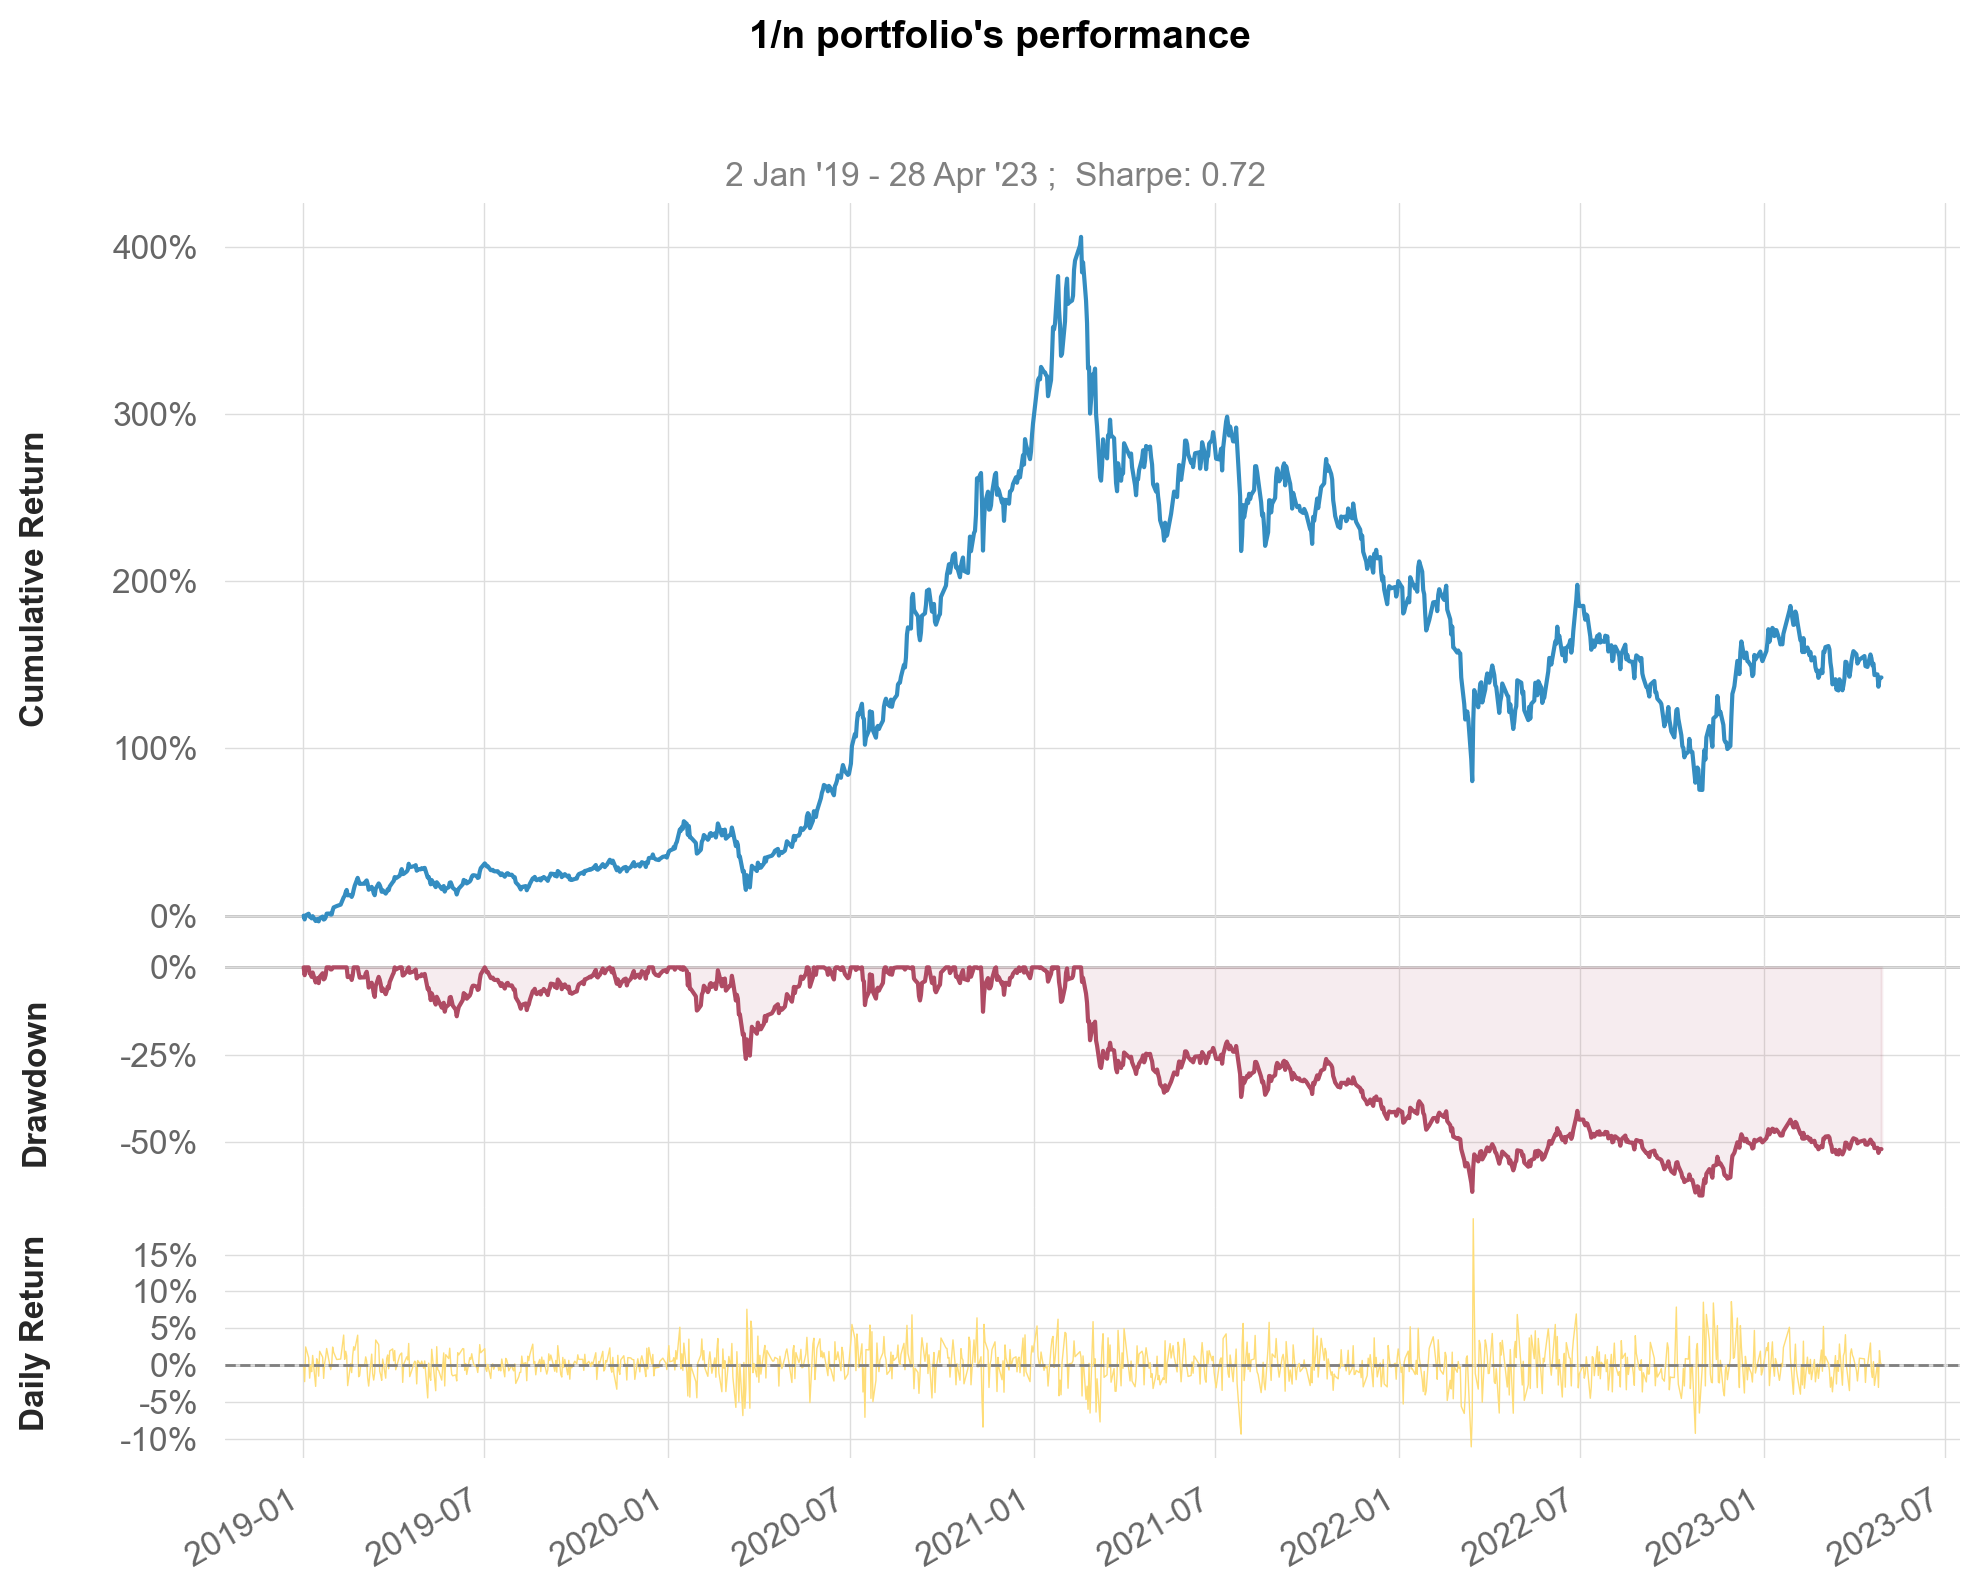

In [26]:
qs.plots.snapshot(portfolio_returns, 
                  title="1/n portfolio's performance", 
                  grayscale=False)

In [27]:
# # portfolio_returns.index = portfolio_returns.tz_convert(None)
# portfolio_returns['date'] = portfolio_returns['date'].dt.tz_localize(None)
# qs.reports.metrics(portfolio_returns, 
#                    benchmark="SPY", 
#                    mode="basic",
#                    prepare_returns=False)

In [28]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252

In [29]:
# returns.mean()
# returns.cov()

In [30]:
avg_returns = returns.mean() * N_DAYS
cov_mat = returns.cov() * N_DAYS

In [31]:
avg_returns

0388.HK    0.165833
1211.HK    0.538901
1810.HK    0.087861
3690.HK    0.464808
6862.HK    0.192020
dtype: float64

In [32]:

# def plot_correlation_matrix(corr_mat, annotate=False):
#     """
#     Function for plotting the correlation heatmap. It masks the irrelevant fields.
    
#     Parameters
#     ----------
#     corr_mat : pd.DataFrame
#         Correlation matrix of the features.
#     """
    
#     # temporarily change style
#     sns.set(style="white")
#     # mask the upper triangle
#     mask = np.zeros_like(corr_mat, dtype=bool)
#     mask[np.triu_indices_from(mask)] = True
#     # set up the matplotlib figure
#     fig, ax = plt.subplots()
#     # set up custom diverging colormap
#     cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
#     # plot the heatmap
#     sns.heatmap(corr_mat, mask=mask, cmap=cmap, 
#                 annot=annotate, vmax=.3, 
#                 center=0, square=True, linewidths=.5, 
#                 cbar_kws={"shrink": .5}, ax=ax)
#     ax.set_title("Correlation Matrix", fontsize=16)
#     # change back to darkgrid style
#     sns.set(style="darkgrid")
    
# plot_correlation_matrix(cov_mat)

In [33]:
# plot the covariance matrix as a heatmap
#sns.heatmap(cov_mat, cmap='coolwarm', annot=True, fmt='.2f')

In [34]:
np.random.seed(7)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [35]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)  

portf_sharpe_ratio = portf_rtns / portf_vol

In [36]:
# portf_rtns

In [37]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df.head()

,returns,volatility,sharpe_ratio
0,0.332279,0.447651,0.742273
1,0.311941,0.397045,0.785655
2,0.299921,0.380888,0.787424
3,0.293603,0.401818,0.730687
4,0.327723,0.414884,0.789916


In [38]:
N_POINTS = 100

ef_rtn_list = []
ef_vol_list = []

possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(), 
    portf_results_df["returns"].max(), 
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)    
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

In [39]:
# cov_mat
# cov_mat.iloc[0:2, :]

In [40]:
def print_portfolio_summary(perf, weights, assets, name):
    
    print(f"{name} portfolio ----")
    print("Performance")
    for index, value in perf.items():
        print(f"{index}: {100 * value:.2f}% ", end="", flush=True)
    print("\nWeights")
    for x, y in zip(assets, weights):
        print(f"{x}: {100*y:.2f}% ", end="", flush=True)

In [41]:
max_sharpe_ind = np.argmax(portf_results_df["sharpe_ratio"])
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df["volatility"])
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [42]:
# np.argmax(portf_results_df["sharpe_ratio"])

In [43]:
#max_sharpe_portf.items()

In [44]:
print_portfolio_summary(max_sharpe_portf, 
                        weights[max_sharpe_ind], 
                        ASSETS, 
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
returns: 48.94% volatility: 49.13% sharpe_ratio: 99.61% 
Weights
0388.HK: 6.33% 1211.HK: 67.13% 1810.HK: 0.13% 3690.HK: 24.29% 6862.HK: 2.12% 

In [45]:
print_portfolio_summary(min_vol_portf, 
                        weights[min_vol_ind], 
                        ASSETS, 
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
returns: 16.42% volatility: 32.21% sharpe_ratio: 50.97% 
Weights
0388.HK: 86.40% 1211.HK: 0.53% 1810.HK: 8.44% 3690.HK: 0.62% 6862.HK: 4.00% 

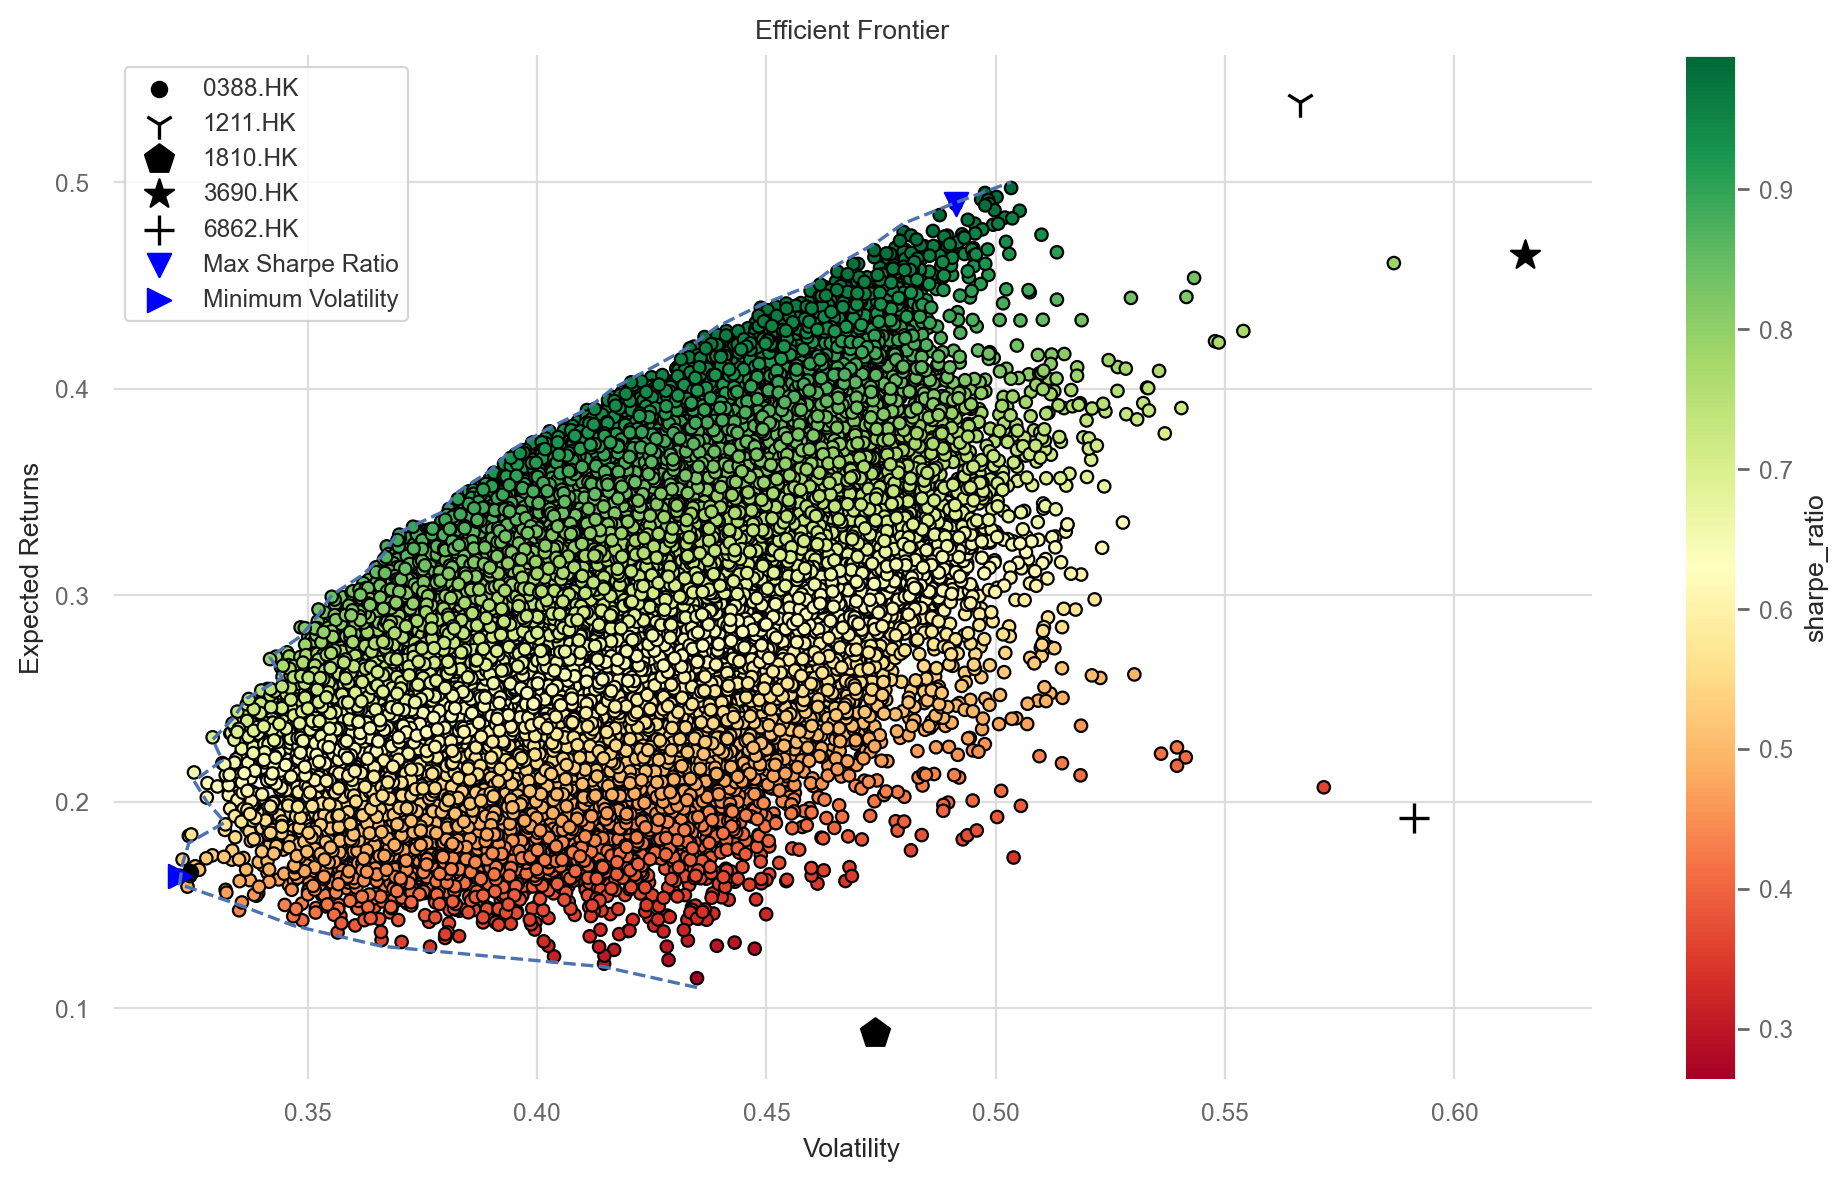

In [46]:
MARKERS = [".", "1", "p", "*", "+"]

with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")
    ax.plot(ef_vol_list, ef_rtn_list, "b--")
    for asset_index in range(n_assets):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                   y=avg_returns[asset_index], 
                   marker=MARKERS[asset_index], 
                   s=120, color="black",
                   label=ASSETS[asset_index])
    ax.scatter(x=max_sharpe_portf.volatility, 
               y=max_sharpe_portf.returns, 
               c="blue", marker="v", 
               s=70, label="Max Sharpe Ratio")
    ax.scatter(x=min_vol_portf.volatility, 
               y=min_vol_portf.returns, 
               c="blue", marker=">", 
               s=70, label="Minimum Volatility")
    ax.legend()

    sns.despine()
    plt.tight_layout()

Using scipy to solve it numerically 

In [47]:
import scipy.optimize as sco

In [48]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [49]:
 tuple((0,1) for asset in range(5))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [50]:
5 * [1. / 5, ]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [51]:
5 * [1. / 5 ]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [52]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constr = (
            {"type": "eq", 
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},
            {"type": "eq", 
             "fun": lambda x: np.sum(x) - 1}
        )
        ef_portf = sco.minimize(get_portf_vol, 
                                initial_guess, 
                                args=args, method="SLSQP", 
                                constraints=constr,
                                bounds=bounds)
        efficient_portfolios.append(ef_portf)
    
    return efficient_portfolios

In [53]:
rtns_range = np.linspace(0.1, 0.55, 200)

In [54]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

In [55]:
vols_range = [x["fun"] for x in efficient_portfolios]

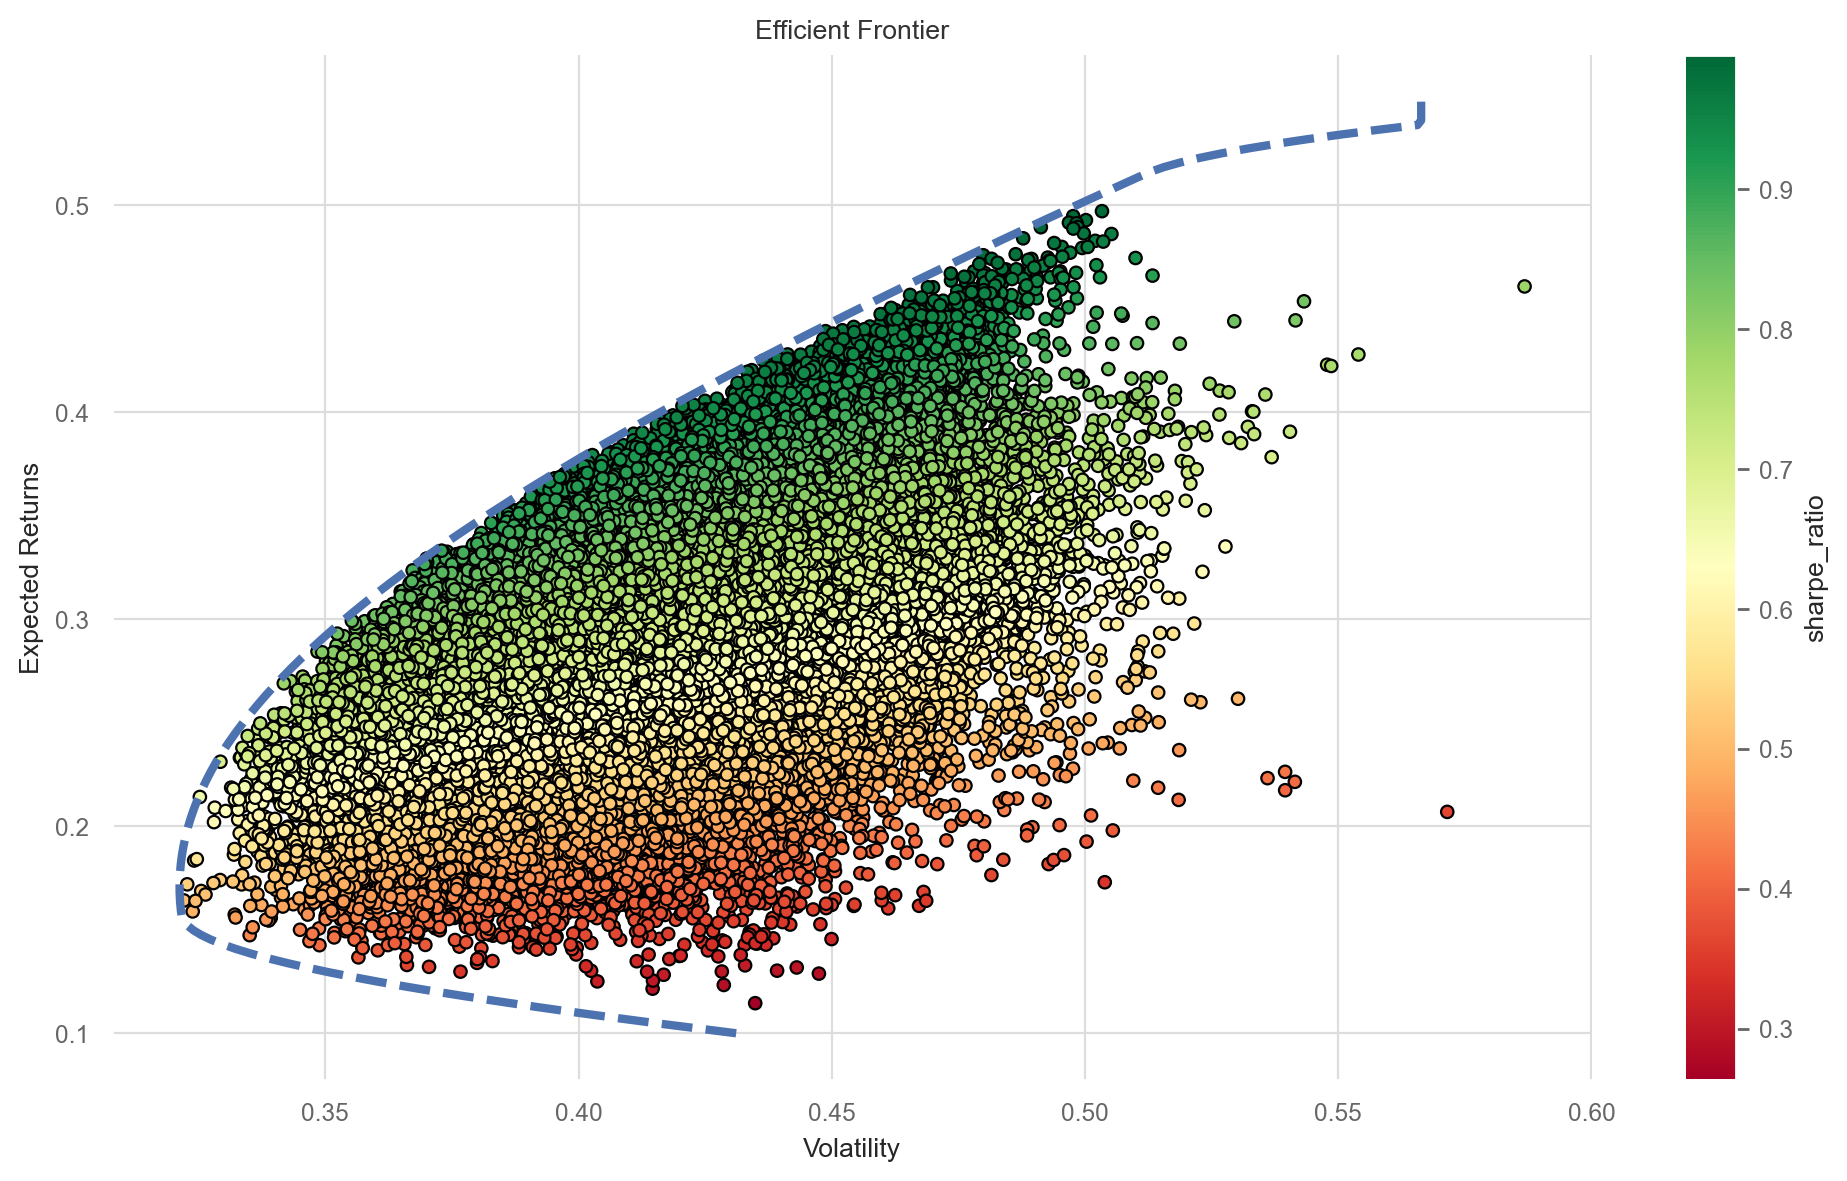

In [56]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    ax.plot(vols_range, rtns_range, "b--", linewidth=3)
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")
    
    sns.despine()
    plt.tight_layout()

In [57]:
import cvxpy as cp

In [59]:
# weights = cp.Variable(n_assets)
# gamma_par = cp.Parameter(nonneg=True)
# portf_rtn_cvx = avg_returns @ weights 
# portf_vol_cvx = cp.quad_form(weights, cov_mat)
# objective_function = cp.Maximize(
#     portf_rtn_cvx - gamma_par * cp.sqrt(portf_vol_cvx)
# )
# problem = cp.Problem(
#     objective_function, 
#     [cp.sum(weights) == 1, weights >= 0]
# )

In [ ]:
avg_returns

In [ ]:
avg_returns @ weights 

In [ ]:
cp.quad_form(weights, cov_mat)

In [ ]:
# N_POINTS = 25
# portf_rtn_cvx_ef = []
# portf_vol_cvx_ef = []
# weights_ef = []
# gamma_range = np.logspace(-3, 3, num=N_POINTS)

# for gamma in gamma_range:
#     gamma_par.value = gamma
#     problem.solve()
#     portf_vol_cvx_ef.append(cp.sqrt(portf_vol_cvx).value)
#     portf_rtn_cvx_ef.append(portf_rtn_cvx.value)
#     weights_ef.append(weights.value)

In [ ]:
avg_returns

In [ ]:
cov_mat

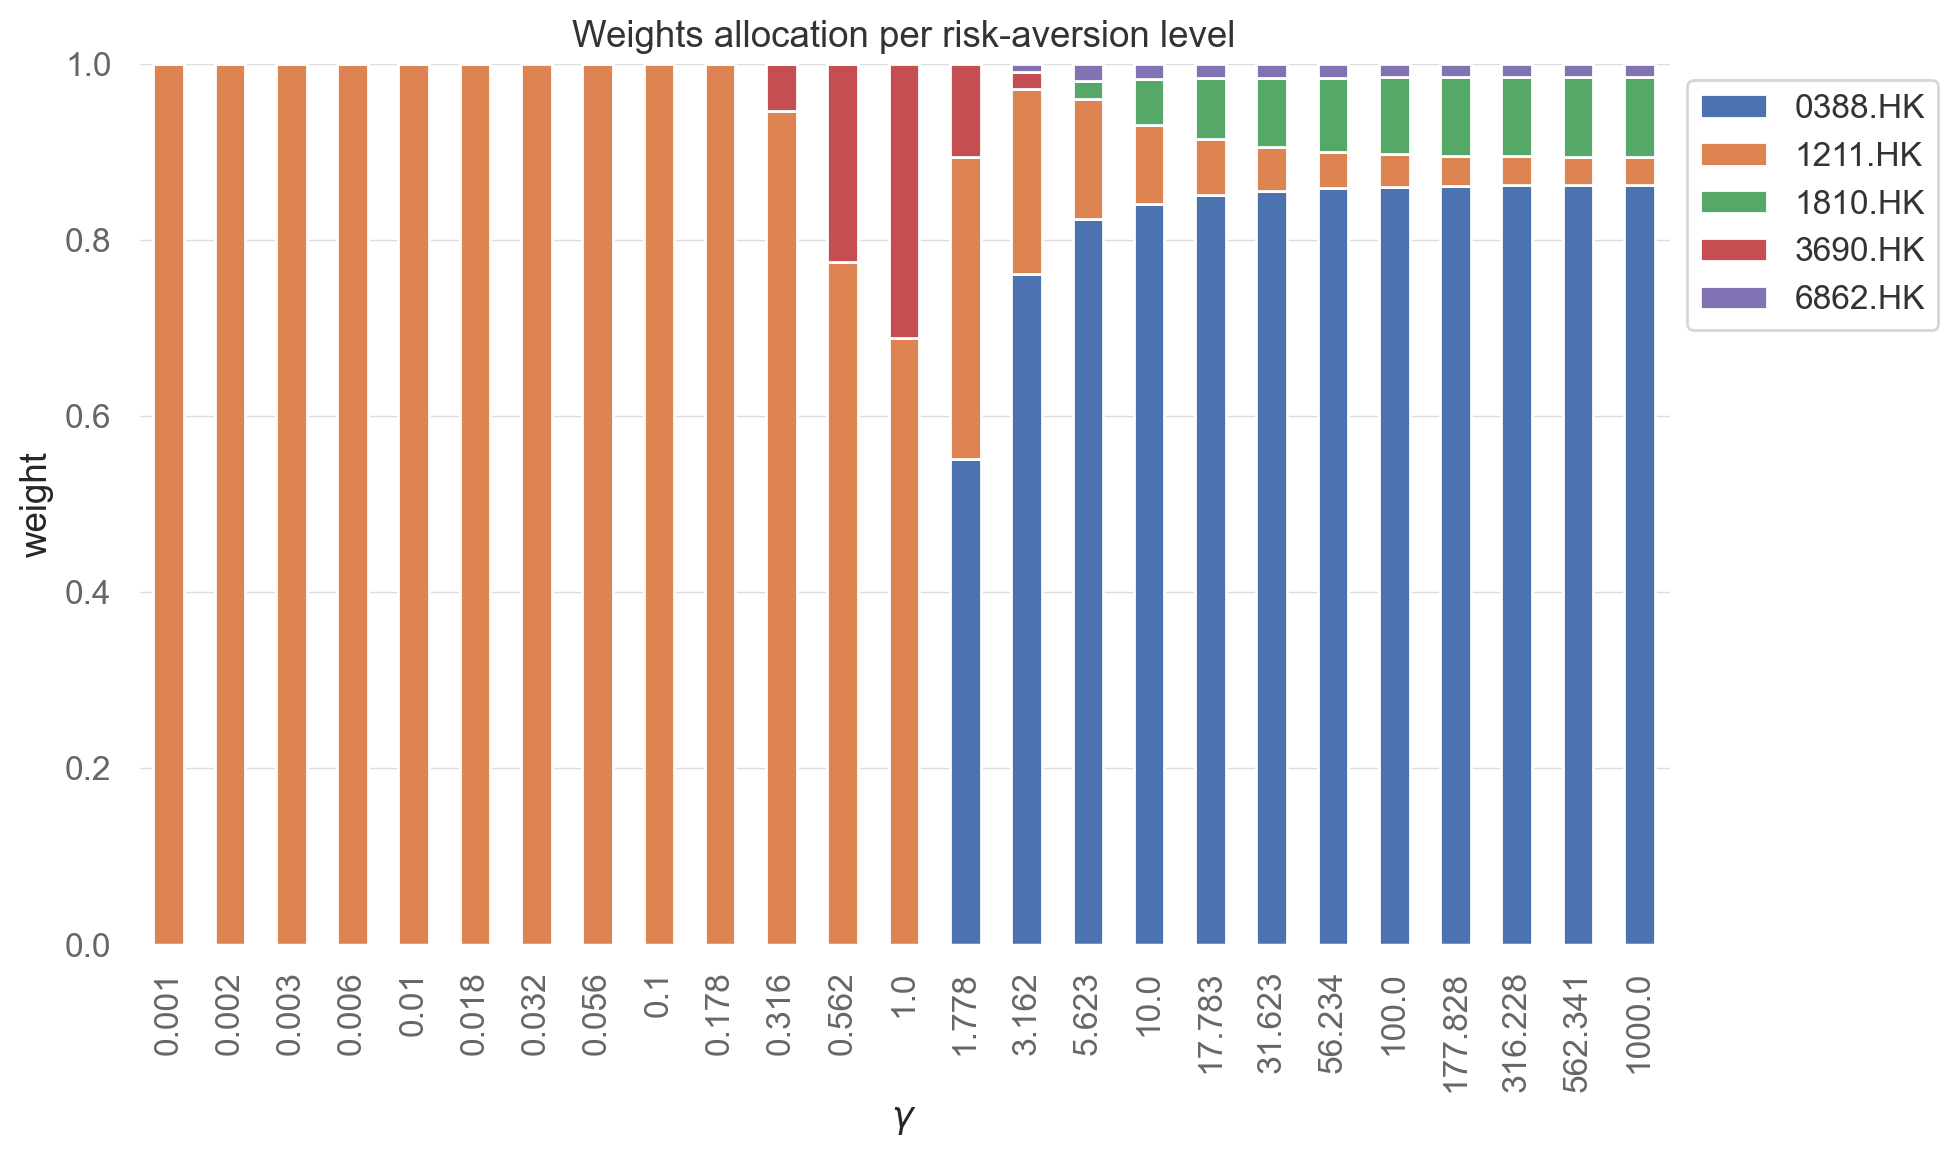

In [60]:
import numpy as np
from scipy.optimize import minimize

# # Define the problem data
# mu = np.array([0.1, 0.2, 0.15])  # expected returns
# Sigma = np.array([[0.05, 0.02, 0.04], [0.02, 0.06, 0.03], [0.04, 0.03, 0.07]])  # covariance matrix
# gamma = 0.5  # risk-aversion parameter

# Define the objective function
def obj_fun(w):
    return -1 * (w.T @ avg_returns - gamma * np.sqrt(w.T @ cov_mat @ w))

# Define the constraints
def constraint1(w):
    return w.T @ np.ones(len(avg_returns)) - 1

def constraint2(w):
    return w

constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]

# Define the initial guess
x0 = np.ones(len(avg_returns)) / len(avg_returns)

# Solve the problem
N_POINTS = 25
weights_ef = []
opt_val = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for gamma in gamma_range:
    gamma_par.value = gamma
    result = minimize(obj_fun, x0, method='SLSQP', constraints=constraints)
    weights_ef.append(result.x)
    opt_val.append(-1 * result.fun)
    

# # Print the optimal portfolio weights and objective value
# print("Optimal portfolio weights:")
# print(result.x)
# print("Optimal objective value: ", -1 * result.fun)

# weights_ef
# opt_val
weights_df = pd.DataFrame(weights_ef, 
                          columns=ASSETS, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind="bar", stacked=True) 
ax.set(title="Weights allocation per risk-aversion level",
       xlabel=r"$\gamma$", 
       ylabel="weight")
ax.legend(bbox_to_anchor=(1,1))

sns.despine()
plt.tight_layout()

In [62]:
np.max(opt_val)

0.5383344798083509

In [74]:
max_opt_val_ind = np.argmax(opt_val)
max_opt_val = opt_val[max_opt_val_ind]
weights_ef[max_opt_val_ind]
print(f"The maximum value of the target function is {max_opt_val:.03f} ----")
for x, y in zip(ASSETS, weights_ef[max_opt_val_ind]):
    print(f"{x}: {100*y:.2f}% ", end="", flush=True)

The maximum value of the target function is 0.538 ----
0388.HK: 0.00% 1211.HK: 100.00% 1810.HK: 0.00% 3690.HK: -0.00% 6862.HK: -0.00% 

In [65]:
max_opt_val_ind

0

In [66]:
max_opt_val

0.5383344798083509

In [67]:
weights_ef[0]

array([ 3.50830882e-16,  1.00000000e+00,  5.62098618e-16, -4.99600361e-16,
       -3.71311337e-17])

0388.HK: 0.00% 1211.HK: 100.00% 1810.HK: 0.00% 3690.HK: -0.00% 6862.HK: -0.00% 

In [2]:
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({
    'Time_idx': [1, 2, 3, 4, 5],
    'Value': [10, 20, 30, 40, 50]
})

# Set the training cutoff
training_cutoff = 3



In [3]:
df

,Time_idx,Value
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [7]:
df.iloc[0,1]

10

In [8]:
df["Time_idx"]

0    1
1    2
2    3
3    4
4    5
Name: Time_idx, dtype: int64

In [ ]:
# Filter the DataFrame based on the training cutoff
training_data = df[lambda x: x["Time_idx"] <= training_cutoff]

# Print the training data
print(training_data)